# Processing Service

## use the magic to add the engine backend

In [ ]:
%log debug
%engine http://docker.for.mac.localhost:8181/csparql

Logging set to DEBUG
Engine set to: http://docker.for.mac.localhost:8181/csparql

## Let's take a look at what this engine can do

Display: svg

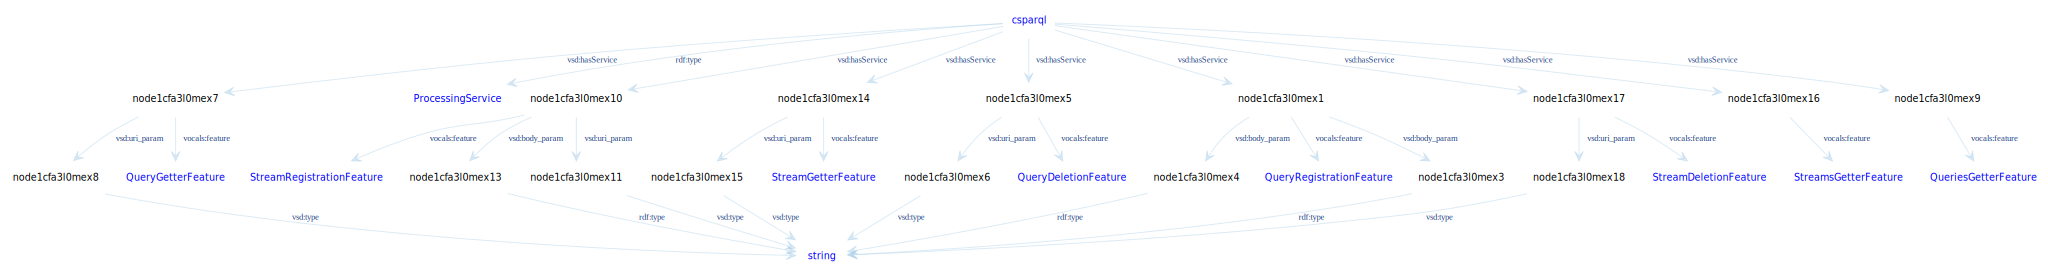

In [87]:
%display diagram
DESCRIBE ENGINE

### We now want to add a stream. 
#### If we wouldn't know which streams to register we can consult a catalog
#### In this case we have a convenient stream just prepared (sorry for the funny url, docker issues)

In [91]:
%display table
DESCRIBE STREAM <http://docker.for.mac.localhost:8181/csparql/streams/s2>

Display: table

subject,predicate,object
N1c16013f07554618b5030780de05b760,https://www.w3.org/TR/vocab-dcat/accessURL,ws://localhost:4040/stream1
http://localhost:8181/csparql/streams/s2,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://w3id.org/rsp/vocals#RDFStream
Nfdfb035ea7f24505b5b4f887d572251b,https://www.w3.org/TR/vocab-dcat/dataset,http://localhost:8181/csparql/streams/s2
Nfdfb035ea7f24505b5b4f887d572251b,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://w3id.org/rsp/vocals#StreamDescriptor
N1c16013f07554618b5030780de05b760,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://w3id.org/rsp/vocals#StreamEndpoint
N1c16013f07554618b5030780de05b760,http://w3id.org/rsp/vocals-sd#publishedBy,http://localhost:8181/csparql
http://localhost:8181/csparql/streams/s2,http://w3id.org/rsp/vocals#hasEndpoint,N1c16013f07554618b5030780de05b760
N1c16013f07554618b5030780de05b760,https://www.w3.org/TR/vocab-dcat/format,frmt:JSON-LD


## We are using c-sparql as both publisher and engine, but we could have used an external publisher

In [89]:
%display table
DESCRIBE STREAM <http://docker.for.mac.localhost:4000/stream1>

Display: table

subject,predicate,object
http://localhost:4000/Triplewave,http://w3id.org/rsp/vocals-sd#resultFormat,http://www.w3.org/ns/formats/JSON-LD
http://localhost:4000/stream1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://w3id.org/rsp/vocals#StreamDescriptor
http://localhost:4000/stream1,https://www.w3.org/TR/vocab-dcat/description,Aggregated stream of different streams produced by traffic sensors spread around Milan
http://localhost:4000/stream1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://w3id.org/rsp/vocals#RDFStream
http://localhost:4000/MilanTrafficStreamEndpoint,http://w3id.org/rsp/vocals-sd#publishedBy,http://localhost:4000/Triplewave
http://localhost:4000/Triplewave,http://w3id.org/rsp/vocals-sd#hasFeature,http://w3id.org/rsp/vocals-sd#replaying
http://localhost:4000/MilanTrafficStreamEndpoint,https://www.w3.org/TR/vocab-dcat/license,https://creativecommons.org/licenses/by-nc/4.0/
http://localhost:4000/MilanTrafficStreamEndpoint,https://www.w3.org/TR/vocab-dcat/title,Milan Traffic Stream Endpoint
http://localhost:4000/stream1,http://w3id.org/rsp/vocals#hasEndpoint,http://localhost:4000/MilanTrafficStreamEndpoint
http://localhost:4000/MilanTrafficStreamEndpoint,https://www.w3.org/TR/vocab-dcat/format,http://www.w3.org/ns/formats/JSON-LD


## Let's start with a simple task, spo C-SPARQL Query

### sorry againt for the uri...docker

In [92]:
%display table
REGISTER TASK q1 AS 
CONSTRUCT {?s ?p ?o} 
FROM STREAM <http://localhost:4000/stream1> [RANGE 1m STEP 10s]  
WHERE {?s ?p ?o}

Display: table

subject,predicate,object
http://localhost:8181/csparql/queries/q1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://w3id.org/rsp/vocals-prov#Task
http://localhost:8181/csparql/queries/q1,http://localhost:8181/csparql/@rdfs:seeAlso,http://localhost:8181/csparql/streams/q1


### It seems that the engine created a stream out of this query

### Let's describe the stream not

In [93]:
%display table
DESCRIBE STREAM <http://docker.for.mac.localhost:8181/csparql/streams/q1>

Display: table

subject,predicate,object
N54f4de490a1148c3aa0ee4c1b1229f6a,https://www.w3.org/TR/vocab-dcat/dataset,http://localhost:8181/csparql/streams/q1
http://localhost:8181/csparql/streams/q1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://w3id.org/rsp/vocals#RDFStream
N54f4de490a1148c3aa0ee4c1b1229f6a,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://w3id.org/rsp/vocals#StreamDescriptor


Display: svg

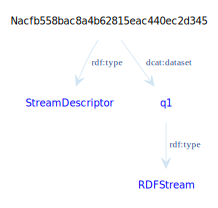

In [94]:
%display diagram
DESCRIBE STREAM <http://docker.for.mac.localhost:8181/csparql/streams/q1>

## the stream exists, but has no endpoint, we need to expose it

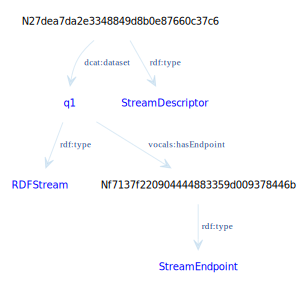

In [95]:
REGISTER STREAM s2 FROM TASK q1

In [96]:
%display table
DESCRIBE STREAM <http://docker.for.mac.localhost:8181/csparql/streams/q1>

Display: table

subject,predicate,object
N37b743342a4742d0917bd5584716a7d8,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://w3id.org/rsp/vocals#StreamEndpoint
N4591015ca5404fdeaedc5f28c807b8bc,https://www.w3.org/TR/vocab-dcat/dataset,http://localhost:8181/csparql/streams/q1
N4591015ca5404fdeaedc5f28c807b8bc,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://w3id.org/rsp/vocals#StreamDescriptor
N37b743342a4742d0917bd5584716a7d8,https://www.w3.org/TR/vocab-dcat/accessURL,ws://localhost:8182/csparql/streams/q1/observers/1267110851
N37b743342a4742d0917bd5584716a7d8,http://w3id.org/rsp/vocals-sd#publishedBy,http://localhost:8181/csparql
http://localhost:8181/csparql/streams/q1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://w3id.org/rsp/vocals#RDFStream
http://localhost:8181/csparql/streams/q1,http://w3id.org/rsp/vocals#hasEndpoint,N37b743342a4742d0917bd5584716a7d8
N37b743342a4742d0917bd5584716a7d8,https://www.w3.org/TR/vocab-dcat/format,frmt:JSON-LD


In [97]:
%display table
REGISTER TASK q2 AS 
CONSTRUCT {?s ?p ?o} 
FROM STREAM <http://localhost:8181/csparql/streams/q1> [RANGE 1m STEP 10s]  
WHERE {?s ?p ?o}

Display: table

subject,predicate,object
http://localhost:8181/csparql/queries/q2,http://localhost:8181/csparql/@rdfs:seeAlso,http://localhost:8181/csparql/streams/q2
http://localhost:8181/csparql/queries/q2,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://w3id.org/rsp/vocals-prov#Task


Display: svg

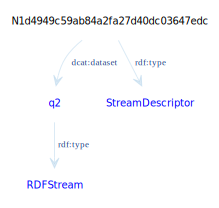

In [98]:
%display diagram
DESCRIBE STREAM <http://docker.for.mac.localhost:8181/csparql/streams/q2>